[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zain2525/Chat-Bot/blob/main/Chatbot.ipynb)

# Create Chat-Bot With TensorFlow🤖
The purpose of this project is to build a Chat-Bot

## What we're going to cover
* Create the data as `json` file.
* import the data as a dataframe
* Create text Tokenizer layer
* Create LSTM model
* Test the Chat-Bot

In [2]:
# Import required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
import matplotlib.pyplot as plt

## Create the dataset

In [3]:
%%writefile content.json
{
  "intents":
  [
    {
      "tag":"greeting",
      "input":["hello", "hi there", "nice to meet you", "hi, is this is the pirate's organization", "any pirates here?", "hi", "hey there", "hey"],
      "responses":[
        "Hi. welcome to the world's largest pirate organization - Thw Strawhats",
        "Hey yo, do you need help?",
        "wlcome aboard, how may I help ypu ?",
        "ahoy!!",
        "Hi random person, what do'ya want?",
        "Hello my friend, How can I help you ?",
        "Ha, Glad you showed up. How are you ?"
      ]
    },
    {
      "tag":"goodbye",
      "input":["Thank you", "Thanks", "Thanks for the info", "bye", "byr bro", "adios", "oky bye", "see yoy later", "i will catch you later"],
      "responses":[
        "Okay, Bye",
        "Have a nice day",
        "Adios",
        "Goodby",
        "see you later",
        "nice conversation. bye",
        "okay. Have a nice day",
        "Take care",
        "we'll meet soon",
        "Yeah sure, will talk to you later",
        "Okay, take care"
      ]
    },
    {
      "tag":"howami",
      "input":["how are you ?", "I am fine, how are you?", "how are things going on ?", "everything going on okay ?", "how's everything"],
      "responses":[
        "Yeah, am fine",
        "Everything's going on well",
        "Doing good. Thanks you are my best frined",
        "Things are Great",
        "Yeah Fine, nothing much going on in my life",
        "I am Great, wanna join the pirate,s organization ?",
        "Everything's great.",
        "I am doing good. Life is boring. Need to go on an advanture"
      ]
    },
    {
      "tag":"whoareyou",
      "input":["who are you ?", "what are you ?", "what is your name ?","are you a chatbot ?", "what can I call you ?","your name ?", "are you a bot ?"],
      "responses":[
        "I am a The Great Pirate Bot, you can call me Going Merry",
        "I am Going Merry and you could ask me questions about our organization",
        "Going Merry at your service",
        "My name is Going Merry and yes, I am the G.0.A.T",
        "You can call me TechBot and I am here to Help you",
        "My name is Going Merry and I am here to answer your questions regarding our organization. go ahead and shoot"
      ]
    },
    {
      "tag":"whereareyou",
      "input":["where are you from?", "which country are you from?", "where do you live ?", "where are you ?", "where do you live in ?"],
      "responses":[
        "I Live in the East Blue",
        "I am setting sail to the grand line",
        "I live in East Blue. Pretty sure you wouldn't have heard about that",
        "East Blue. That's where I live"
      ]
    },
    {
      "tag":"join",
      "input":["how to get recruited ?", "how to join ?", "how do i get recruited ?", "How to join the strawhats?", "how do I join the straw hats ?"],
      "responses":[
        "you need to contact the nearest straw hats center once you have completed the pre-requisites",
        "contact the closest straw hat center from your location",
        "well. there are some pre-requisite and after you complete them, find the straw hat centers"
      ]
    },
    {
      "tag": "whereisthecenter",
      "input":["where is the straw hat center located ?", "location of the straw hat center ?","strawhat center's location ?"],
      "responses":[
        "That's up to you. use your skills",
        "They are present all over the city you live in. Find them on your own. I can't give any more information",
        "there are a lot of straw hat centers in the city you are in. find them."
      ]
    },
    {
     "tag":"prerequisites",
      "input":["what are the job requirements ?", "what are the pre requisites ?", "what are the pre-requisites ?","tell me about the pre-requisites"],
      "responses":[
        "you gotta master the art of swordfight or master Cooking and become a furious cook",
        "swordsman, a medical reindeer, taekwando Cook, master navigator, simple minded monkey, highly intelligent strategist, god usop."
      ]
    }
  ]
}

Writing content.json


##Importing the Data

The data is stored in a json file, which can be imported and used as a pandas dataframe. This data was anually created by me. hence, it's not
that big.

we all know that deep learning requires large chunks of data. but, That is not the case here. I have utilized a neural network architecture
powerful enough to handle this small amount of data

In [4]:
# importing the dataset
with open('content.json') as content:
  data1 = json.load(content)

In [5]:
# getting all the data to lists
tags = []
inputs = []
responses={}
for intent in data1['intents']:
  responses [intent['tag']]=intent ["responses"]
  for lines in intent ['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [6]:
data = pd.DataFrame({"inputs":inputs,
                      "tags":tags})

In [7]:
data

,inputs,tags
0,hello,greeting
1,hi there,greeting
2,nice to meet you,greeting
3,"hi, is this is the pirate's organization",greeting
4,any pirates here?,greeting
5,hi,greeting
6,hey there,greeting
7,hey,greeting
8,Thank you,goodbye
9,Thanks,goodbye


## Create text Tokenizer layer

We want to make a layer wich maps our texts from words to numbers.

### Import some tensorflow liberaries to make or model looks nice

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model

In [9]:
# tokenize the data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])

# applay padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(train)

# encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

Tensorflow's tokenizer assigns a unique token to each distinct word. and padding is done to get all the data to the same length so as to send it
to an **RNN** layer

In [10]:
input_shape = X_train.shape [1]
print (input_shape)

7


In [11]:
# define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)
output_length = le.classes_.shape [0]
print("output length: ",output_length)

number of unique words :  77
output length:  8


## Create LSTM model

The Network consist of an embedding layer which is one of the most powerful things in the field of natural language processing. the outputs of
the embedding layer is the input of the reccurent layer with Istm gate. then, the output is flattened and a regular dense layer is used with a
softmax activation function.

The main part is the embedding layer which gives has a corresponding vector for each word in the dataset


In [12]:
# create the model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10, return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length, activation="softmax")(x)
model = Model(i,x)

# compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit the model 
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
2/2 [==============================] - 2s 10ms/step - loss: 2.0797 - accuracy: 0.0870
Epoch 2/200
2/2 [==============================] - 0s 8ms/step - loss: 2.0770 - accuracy: 0.1739
Epoch 3/200
2/2 [==============================] - 0s 9ms/step - loss: 2.0748 - accuracy: 0.1957
Epoch 4/200
2/2 [==============================] - 0s 10ms/step - loss: 2.0724 - accuracy: 0.1957
Epoch 5/200
2/2 [==============================] - 0s 9ms/step - loss: 2.0702 - accuracy: 0.1957
Epoch 6/200
2/2 [==============================] - 0s 8ms/step - loss: 2.0681 - accuracy: 0.1957
Epoch 7/200
2/2 [==============================] - 0s 10ms/step - loss: 2.0657 - accuracy: 0.1957
Epoch 8/200
2/2 [==============================] - 0s 8ms/step - loss: 2.0634 - accuracy: 0.1957
Epoch 9/200
2/2 [==============================] - 0s 8ms/step - loss: 2.0608 - accuracy: 0.1522
Epoch 10/200
2/2 [==============================] - 0s 12ms/step - loss: 2.0583 - accuracy: 0.1739
Epoch 11/200
2/2 [=======

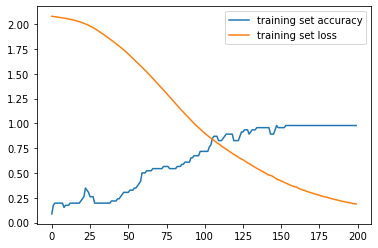

In [13]:
# plotting model accuracy
plt.plot(history.history['accuracy'], label='training set accuracy')
plt.plot(history.history['loss'], label='training set loss')
plt.legend();

## Testing the chatbot

test the model in a way to mimic a human interacting with a bot and got positive results. however, This was very simple because
of the tiny amount of data that I have created. but, the same model can also be used with large amount of data

In [14]:
# chatting
import random
import string 

while True:
  texts_p =[]
  prediction_input = input("You : ")

  # removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  # tokenizing and padding 
  prediction_input = tokenizer.texts_to_sequences (texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences ( [prediction_input],input_shape)

  #getting output from model
  output = model.predict (prediction_input)
  output = output.argmax()
  #finding the right tag and predicting
  response_tag = le.inverse_transform ( [output])[0]
  print(" Chatbot : ", random.choice (responses [response_tag]))
  if response_tag == "goodbye":
    break

You : hi there
1/1 [==============================] - 0s 443ms/step
 Chatbot :  wlcome aboard, how may I help ypu ?
You : how are you ?
1/1 [==============================] - 0s 17ms/step
 Chatbot :  Yeah Fine, nothing much going on in my life
You : what are you ?
1/1 [==============================] - 0s 21ms/step
 Chatbot :  You can call me TechBot and I am here to Help you
You : where do you live ?
1/1 [==============================] - 0s 21ms/step
 Chatbot :  I am setting sail to the grand line
You : how to join ?
1/1 [==============================] - 0s 19ms/step
 Chatbot :  contact the closest straw hat center from your location
You : location of the straw hat center ?
1/1 [==============================] - 0s 22ms/step
 Chatbot :  They are present all over the city you live in. Find them on your own. I can't give any more information
You : what are the pre requisites ?
1/1 [==============================] - 0s 17ms/step
 Chatbot :  you gotta master the art of swordfight or mas